<h1 align="center">Paris housing category  </h1>

#### 1.1 Data Dictionary <a id=2></a>

'squareMeters'

'numberOfRooms'

'hasYard'

'hasPool'

'floors' - number of floors

'cityCode' - zip code

'cityPartRange' - the higher the range, the more exclusive the neighbourhood is

'numPrevOwners' - number of prevoious owners

'made' - year

'isNewBuilt'

'hasStormProtector'

'basement' - basement square meters

'attic' - attic square meteres

'garage' - garage size

'hasStorageRoom'

'hasGuestRoom' - number of guest rooms

'price' - price of a house

'category' - Luxury or Basic

#### 1.2 Task <a id=3></a>
To predic house category

#### 2.1 Packages <a id=5></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 2.2 Data <a id=5></a>

In [2]:
data = pd.read_csv("ParisHousingClass.csv" , sep=',' , encoding='utf-8')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
data.shape

(10000, 18)

In [6]:
dict = {}
for i in list(data.columns):
  dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
squareMeters,9483
numberOfRooms,100
hasYard,2
hasPool,2
floors,100
cityCode,9509
cityPartRange,10
numPrevOwners,10
made,32
isNewBuilt,2


In [7]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

<AxesSubplot:>

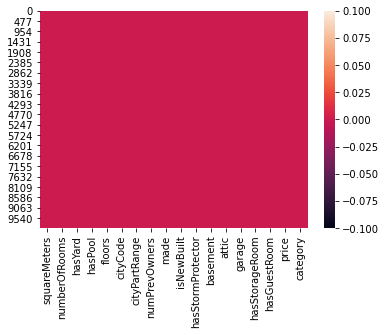

In [8]:
sns.heatmap(data.isnull())

In [9]:
len(data)-len(data.drop_duplicates())


0

In [10]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

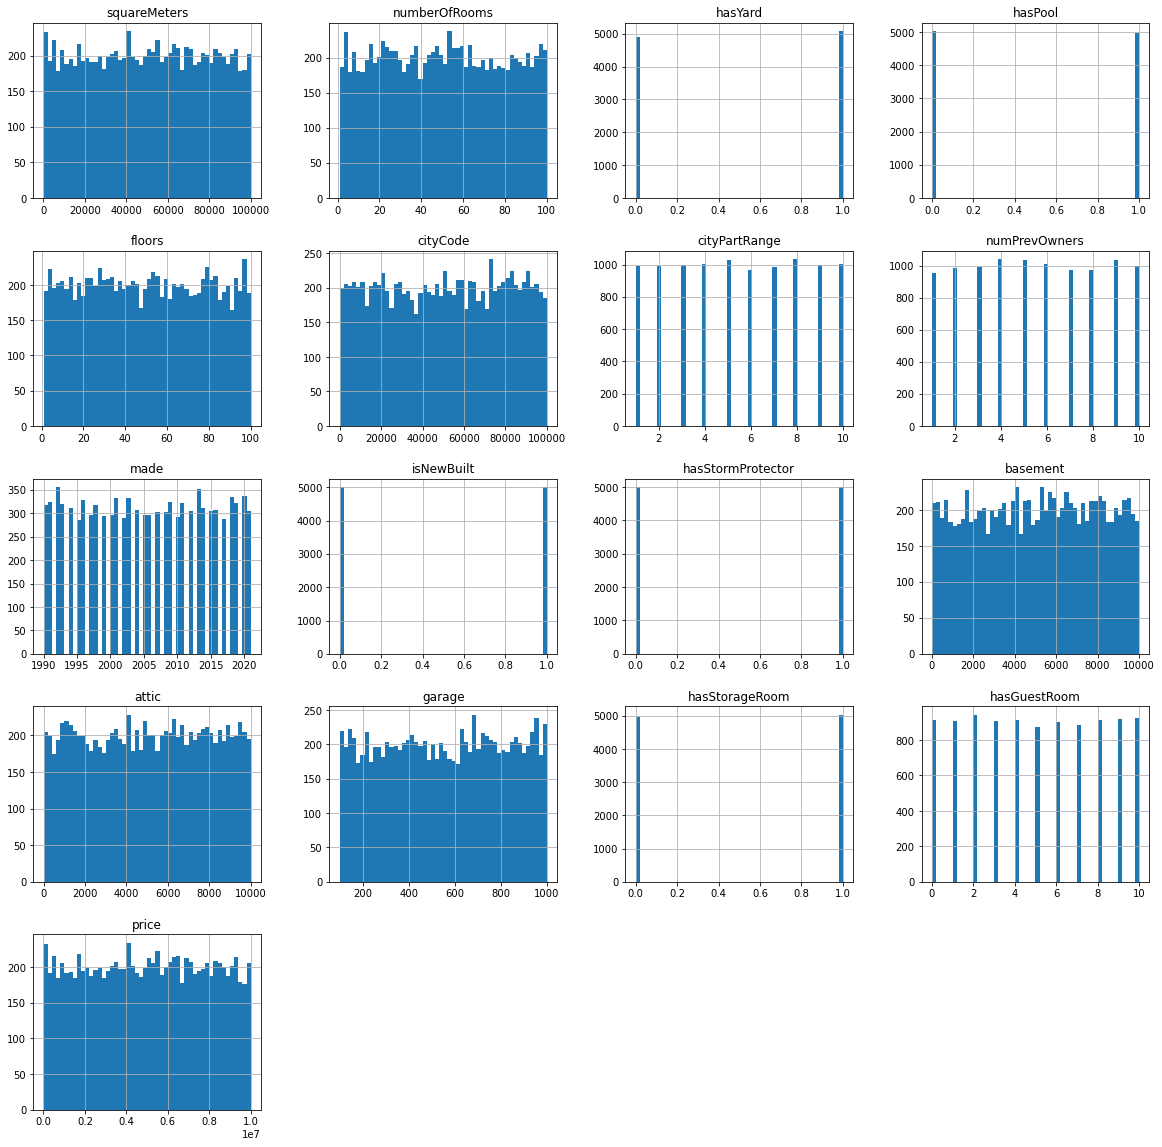

In [11]:
data.hist(bins = 50, figsize = (20,20))
plt.show()

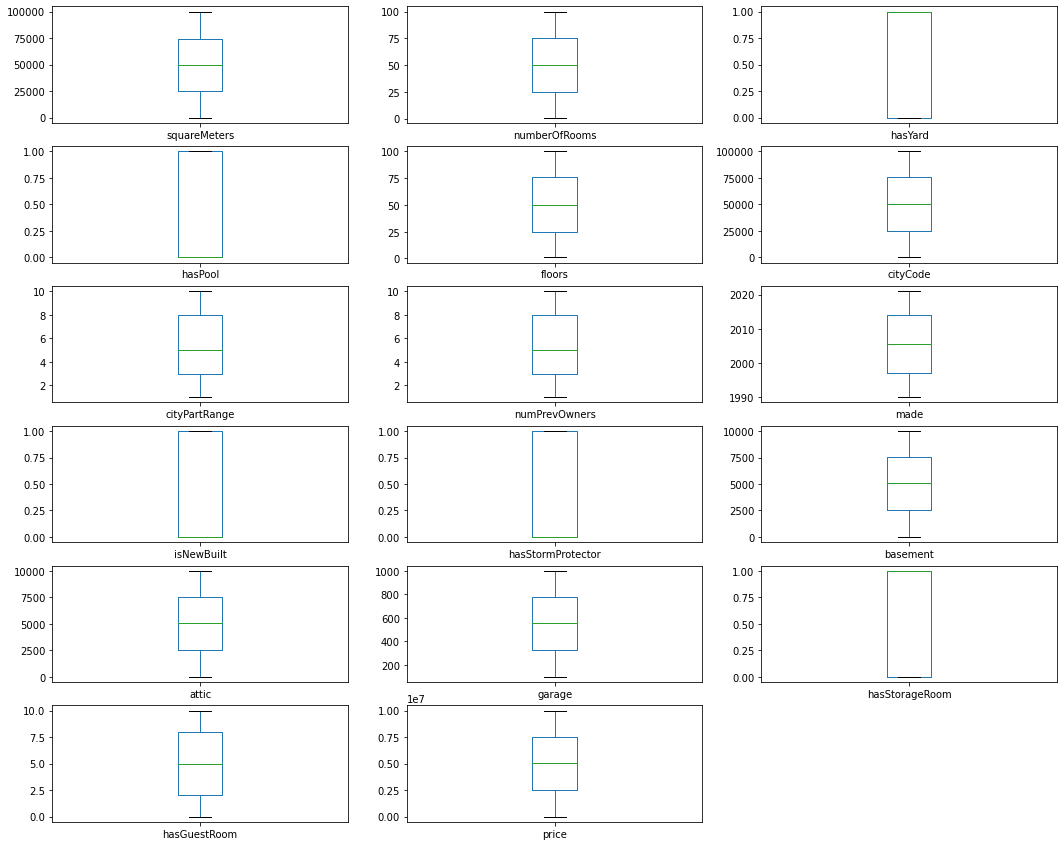

In [12]:
data.plot(kind = "box" , subplots = True , figsize = (18,15) , layout =(6,3))
plt.show()

In [13]:
# Boxplot showed no outlier

In [14]:
data['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

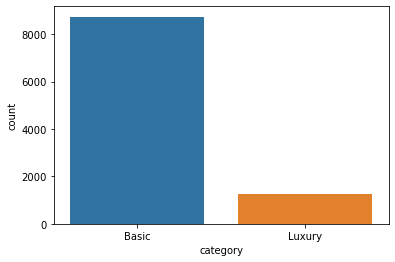

In [15]:
sns.countplot(x='category', data=data)

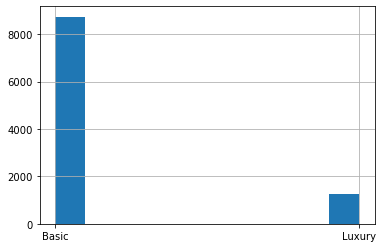

In [16]:
data['category'].hist(bins=10)
plt.show()

<AxesSubplot:xlabel='hasYard', ylabel='count'>

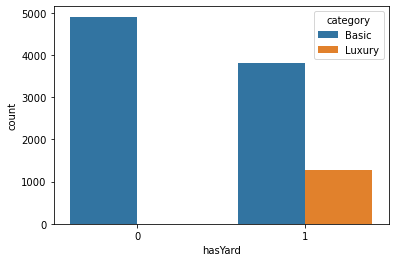

In [17]:
sns.countplot(x='hasYard', hue='category',data=data)

In [18]:
# all luxury has yard

<AxesSubplot:xlabel='hasStorageRoom', ylabel='count'>

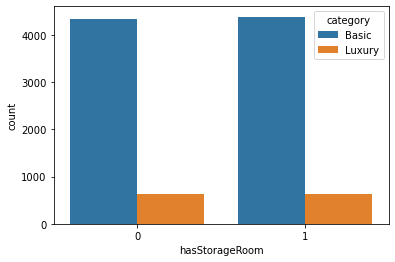

In [19]:
sns.countplot(x='hasStorageRoom', hue='category',data=data)

In [20]:
# NO effect of storage room on luxury

<AxesSubplot:xlabel='hasPool', ylabel='count'>

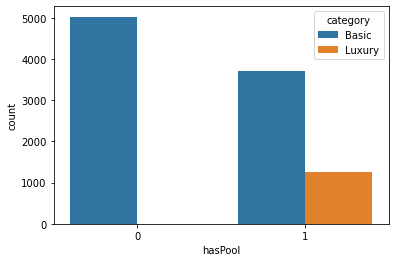

In [21]:
sns.countplot(x='hasPool', hue='category',data=data)

In [22]:
# all luxury has pool

<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

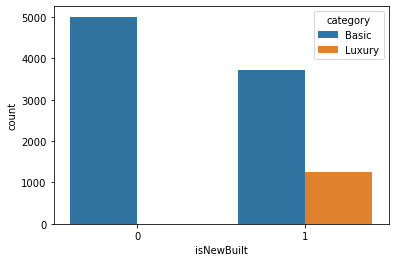

In [23]:
sns.countplot(x='isNewBuilt', hue='category',data=data)

In [24]:
# all luxury is new built

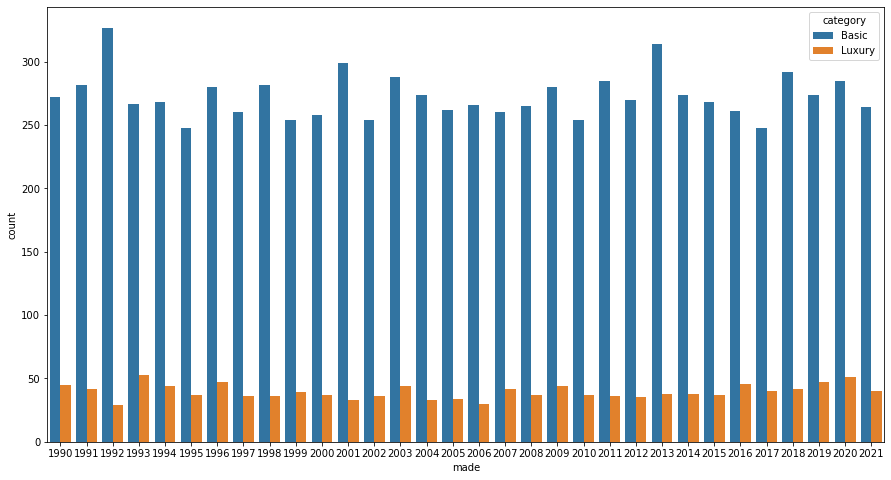

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='made', hue='category',data=data)
plt.show()

In [26]:
#Made year has no effect

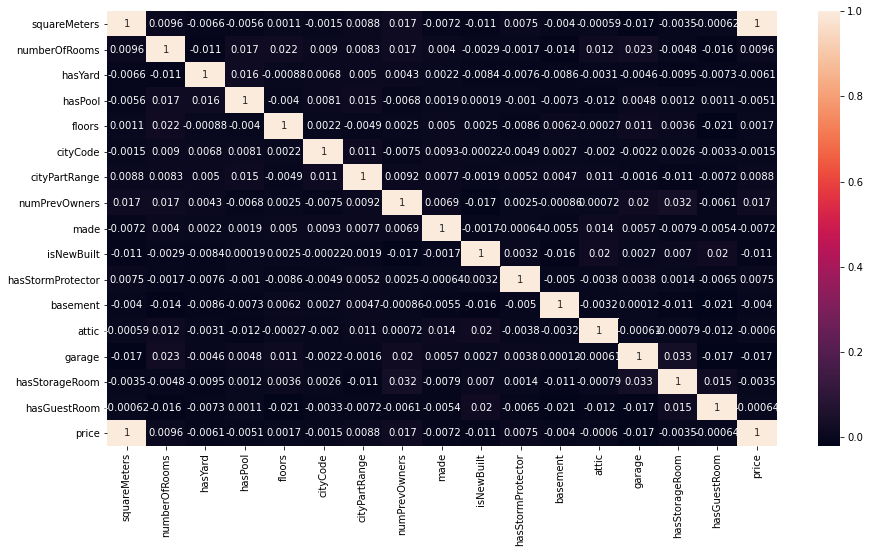

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True, cbar=True)
plt.show()

In [28]:
#only price and squaremeters have strong dependencies

<AxesSubplot:xlabel='isNewBuilt', ylabel='count'>

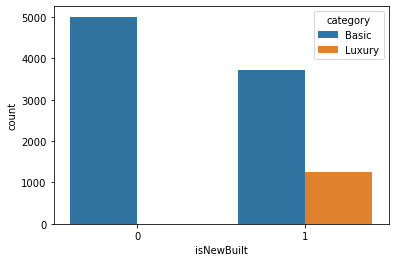

In [29]:
sns.countplot(x='isNewBuilt', hue='category',data=data)

In [30]:
# all luxury are new built

# Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
Activity_le=LabelEncoder()
data['category'] = Activity_le.fit_transform(data['category'])
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


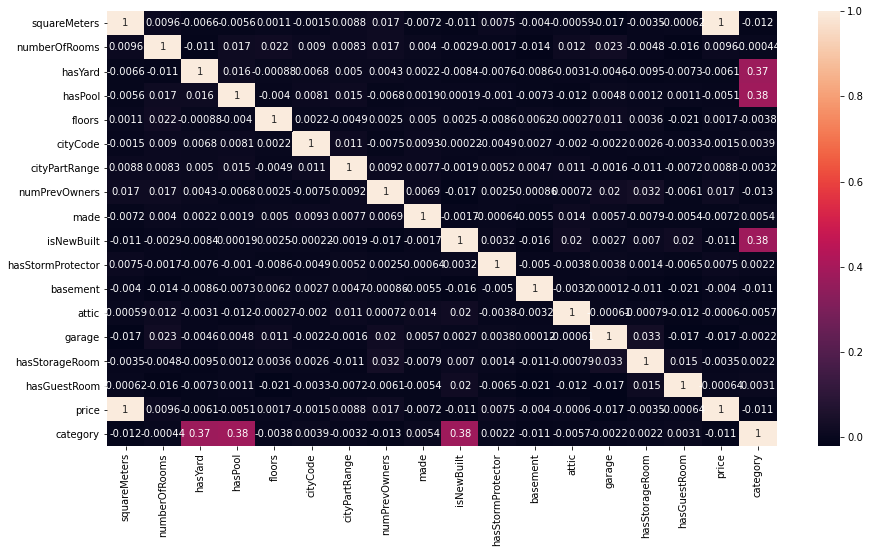

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot= True, cbar=True)
plt.show()

In [35]:
# Target( luxury or basic is correlated to hasYard, hasPool and isnewBuilt)
#There is a stong correlation between price and squareMeters. so, we decided to drop squareMeter to apply the model

In [36]:
data.drop(['squareMeters'], axis=1, inplace =True)
data

,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


# Handling imbalanced data by undersampling the majority class

In [37]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
X =data.drop(['category'], axis = 1).values
y = data['category'].values

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)


In [40]:
y_sm

array([0, 1, 0, ..., 1, 1, 1])

In [41]:
data['category'].value_counts()

0    8735
1    1265
Name: category, dtype: int64

In [42]:
df_categ = pd.DataFrame (y_sm)
print (df_categ)

       0
0      0
1      1
2      0
3      0
4      1
...   ..
17465  1
17466  1
17467  1
17468  1
17469  1

[17470 rows x 1 columns]


In [43]:
df_categ.value_counts()

0    8735
1    8735
dtype: int64

In [44]:
X=X_sm

In [45]:
y=y_sm

# Split and Feature scaling

In [46]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [47]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Models

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier(max_depth = 5, max_features= 7)

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=7)

In [51]:
dt.score(X_train, y_train)

1.0

In [52]:
dt.score(X_test, y_test)


1.0

In [53]:
dt_pred = dt.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
print(cm)

[[2229    0]
 [   0 2139]]


<AxesSubplot:>

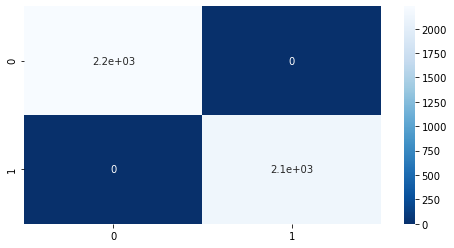

In [55]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Blues_r")

[Text(279.0, 570.7800000000001, 'X[2] <= -0.471\ngini = 0.5\nsamples = 13102\nvalue = [6506, 6596]'),
 Text(139.5, 407.70000000000005, 'gini = 0.0\nsamples = 3759\nvalue = [3759, 0]'),
 Text(418.5, 407.70000000000005, 'X[1] <= -0.489\ngini = 0.415\nsamples = 9343\nvalue = [2747, 6596]'),
 Text(279.0, 244.62, 'gini = 0.0\nsamples = 1799\nvalue = [1799, 0]'),
 Text(558.0, 244.62, 'X[8] <= -0.478\ngini = 0.22\nsamples = 7544\nvalue = [948, 6596]'),
 Text(418.5, 81.53999999999996, 'gini = 0.0\nsamples = 948\nvalue = [948, 0]'),
 Text(697.5, 81.53999999999996, 'gini = 0.0\nsamples = 6596\nvalue = [0, 6596]')]

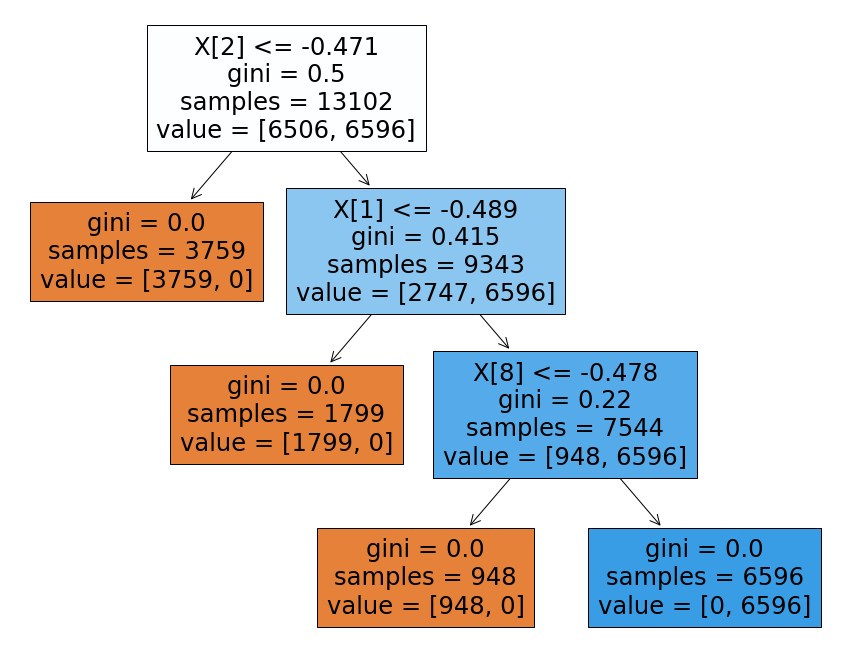

In [56]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled = True)

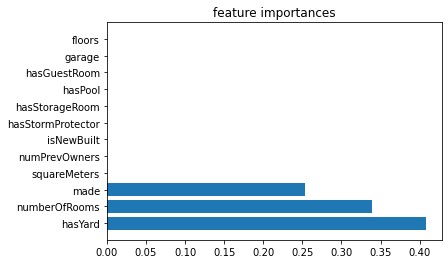

In [57]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price']
    
#rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
#rf.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=12)

# Random Force

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(max_depth= 3 , max_features= 6 , random_state= 42)

In [60]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=3, max_features=6, random_state=42)

In [61]:
rf.score(X_train,y_train)

1.0

In [62]:
rf.score(X_test,y_test)

1.0

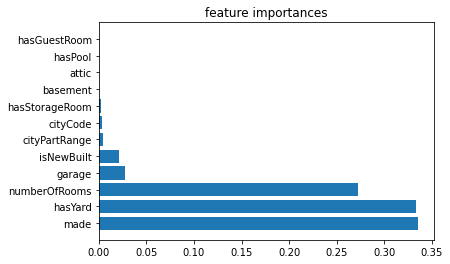

In [63]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price']

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=12)

In [64]:
rf_pred = rf.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[2229    0]
 [   0 2139]]


<AxesSubplot:>

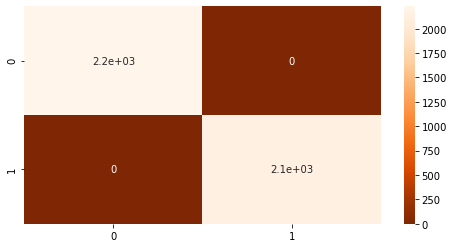

In [66]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Oranges_r")

In [67]:
data.head()

,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


In [68]:
# predict new houses category
new_house = [4,1,0,5,27939,9,3,2018,1,1,500,10000,120,1,1,6574642]


In [69]:
rf.predict([new_house])

array([1])

In [70]:
rf.predict_proba([new_house])


array([[0.15844033, 0.84155967]])

# XGBoost

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier(learning_rate= 0.4 , max_depth= 2 , objective="binary:logistic")

In [74]:
xgb.fit(X_train , y_train)

[19:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb.score(X_train,y_train)

1.0

In [76]:
xgb.score(X_test,y_test)


1.0

In [77]:
xg_pred = xgb.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xg_pred)
print(cm)

[[2229    0]
 [   0 2139]]


<AxesSubplot:>

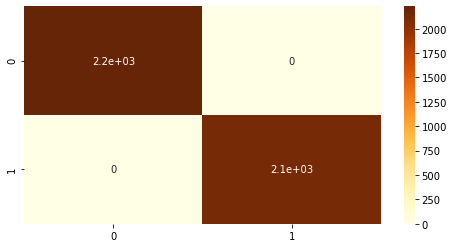

In [79]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="YlOrBr")

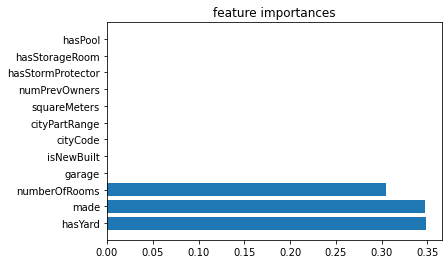

In [80]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price']

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(xgb.feature_importances_), features_names, top=12)


In [81]:
#Changing learning rate
xgb = XGBClassifier(learning_rate= 0.5 , max_depth= 3 , objective="binary:logistic")

In [82]:
xgb.fit(X_train , y_train)

[19:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
xgb.score(X_train,y_train)

1.0

In [84]:
xgb.score(X_test,y_test)


1.0

# Support Victor Machine

In [85]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [86]:
classifier.score(X_train,y_train)

1.0

In [87]:
classifier.score(X_test,y_test)


1.0

In [88]:
sv_pred = classifier.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, sv_pred)
print(cm)

[[2229    0]
 [   0 2139]]


<AxesSubplot:>

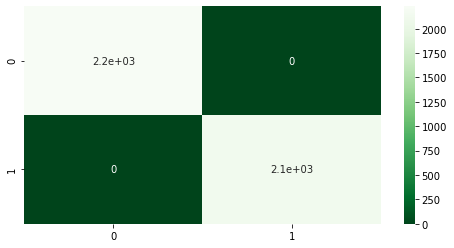

In [90]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Greens_r")

# Logistic function

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [92]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
classifier.classes_

array([0, 1])

In [95]:
classifier.intercept_

array([-4.01428683])

In [96]:
classifier= LogisticRegression(C=0.1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(classifier.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [97]:
classifier= LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(classifier.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [98]:
lg_pred = classifier.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lg_pred)
print(cm)

[[2229    0]
 [   0 2139]]


<AxesSubplot:>

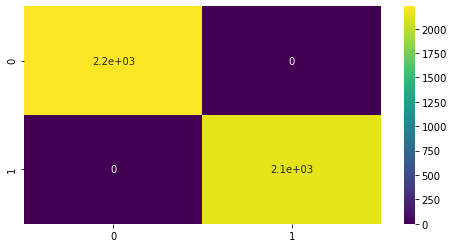

In [100]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="viridis")

# KNeighbors


In [101]:
from sklearn.neighbors import KNeighborsClassifier


In [102]:
knn = KNeighborsClassifier(n_neighbors=5)


In [103]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [104]:
print(knn.score(X_test, y_test))


0.9823717948717948


In [105]:
print(knn.score(X_train, y_train))


0.9925202259197069


In [125]:
# Setup arrays to store train and test accuracies
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
# Loop over different values of k
for i, k in enumerate(n_neighbors):
# Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(k)
# Fit the classifier to the training data
 knn.fit(X_train, y_train)
 train_accuracy[i] = knn.score(X_train,y_train)
 test_accuracy[i] = knn.score(X_test, y_test)


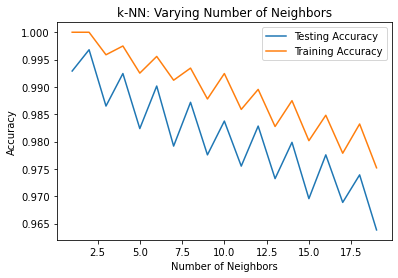

In [126]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [108]:
kn_pred = knn.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, kn_pred)
print(cm)

[[2071  158]
 [   0 2139]]


<AxesSubplot:>

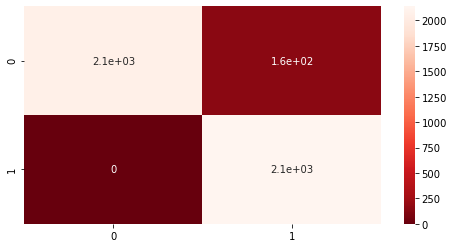

In [110]:
plt.figure(figsize = (8,4))
sns.heatmap(cm , annot = True, cmap="Reds_r")

In [111]:
from sklearn.metrics import accuracy_score 

In [112]:
f1_score=accuracy_score
dt_f1 =f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, kn_pred)
svm_f1 = f1_score(y_test, sv_pred)
RF_f1 = f1_score(y_test, rf_pred)
logreg_f1 = f1_score(y_test, lg_pred)

In [116]:
x=['Decision Tree','KNN','Random Forest','SVM','Logistic Regression']
y=[dt_f1,knn_f1,RF_f1,svm_f1,logreg_f1]


<Figure size 1440x1440 with 0 Axes>

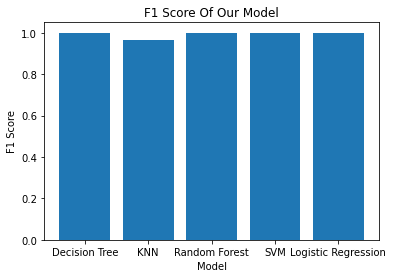

In [117]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(x, y, width=0.8)
plt.title('F1 Score Of Our Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()